# Precision recall analysis

Use cytominer eval to calculate Precision recall @k

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
#import plotnine as gg

from cytominer_eval import evaluate
from pycytominer.cyto_utils import infer_cp_features

In [2]:
data_loc = '/Users/mbornhol/git/lincs-cell-painting/consensus/2016_04_01_a549_48hr_batch1'
#'2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz'
file_name = '2016_04_01_a549_48hr_batch1_consensus_modz_feature_select.csv.gz'
name = os.path.join(data_loc, file_name)
df = pd.read_csv(name)
#df = df.drop(columns  = ['Nuclei_AreaShape_MedianRadius','Cells_Correlation_Manders_AGP_RNA','Cells_Neighbors_NumberOfNeighbors_10'])

In [13]:
data_dir = 'data/2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz'
df = pd.read_csv(data_dir)
print(df.shape)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)

(10752, 528)


In [16]:
# Clean data
def drop_bad_feats(df_old, features_old, threshold):
    drop_features = []
    for feat in features_old:
        if (np.abs(df_old[feat]) > threshold).any():
            drop_features.append(feat)
    df_clean = df.drop(drop_features,  axis = "columns")
    print("dropped {} features".format(len(drop_features)))
    return df_clean

df = drop_bad_feats(df, features, 100)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
ls = df.Metadata_moa.unique()[:15].tolist()
selected_moa= df.query("Metadata_moa==@ls")
print(len(selected_moa))
print(len(df.Metadata_broad_sample.unique()))

dropped 0 features
624
1571


Scaling

| # rows      | time in sec |
| ----------- | ----------- |
| 168      | 0.3       |
| 360   | 1.1        |
| 1000   | 8.8       |
| 1800   | 27.8        |
| 4200  | 478       |

Its almost O(n**3)

2.4211562069999957


In [18]:
precision_recall_at_k = []

for k in [5, 10, 15, 20, 25]:
    precision_recall_results = evaluate(
        profiles=selected_moa,
        features=features,
        meta_features=meta_features,
        replicate_groups=["Metadata_broad_sample"],
        operation="precision_recall",
        similarity_metric="pearson",
        precision_recall_k=k
    )
    precision_recall_at_k.append(precision_recall_results)

df_res_1 = pd.concat(precision_recall_at_k).reset_index(drop=True)

pr_av = []
for k in df_res_1.k.unique():
    pr_av.append(df_res_1.query("k==@k").mean().tolist())
result = pd.DataFrame(pr_av, columns=["k","precision","recal"])

<AxesSubplot:xlabel='k'>

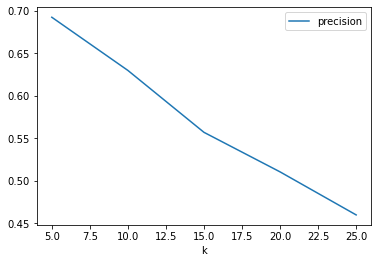

In [19]:
result.plot(x='k', y='precision')